In [129]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
from collections import defaultdict

sys.path.append(f"./../")
from src import SpaceEfficientVQF, Clause

In [130]:
# Load data from CSV
folder = f"./../data/biprimes/"
maxpow = 100  # 40

df = pd.read_csv(f"{folder}biprimes_maxpow_{maxpow}_number_200.csv")
biprimes = df["m=p*q"].to_list()
biprimes = [int(biprimes[i]) for i in range(len(biprimes))]

In [131]:
def binary_length_interval(numbers, min_length, max_length):
    selected_numbers = []
    for num in numbers:
        binary_repr = bin(num)[2:]  # Convert to binary and remove the '0b' prefix
        binary_length = len(binary_repr)
        if min_length <= binary_length <= max_length:
            selected_numbers.append(num)
    return selected_numbers

n1 = 10
n2 = 20
n3 = 30
n4 = 40

# Example usage:
min_len = n1 - 1
max_len = n1 + 1
m1 = binary_length_interval(biprimes, min_len, max_len)
m1 = max(m1)
print(m1)  

min_len = n2 - 1
max_len = n2 + 1
m2 = binary_length_interval(biprimes, min_len, max_len)
m2 = max(m2)
print(m2)

min_len = n3 - 1 
max_len = n3 + 1
m3 = binary_length_interval(biprimes, min_len, max_len)
m3 = max(m3)
print(m3)

min_len = n4 - 1 
max_len = n4 + 1
m4 = binary_length_interval(biprimes, min_len, max_len)
m4 = max(m4)
print(m4)

703
1687927
714433477
1753778247857


In [132]:
m_list = [m1, m2, m3, m4]
m_list = [int(m_list[i]) for i in range(len(m_list))]
markers = ['o', 's', '^', 'D']
colors = ['blue', 'green', 'red', 'purple']

In [133]:
# Initialize lists to store data for all m values
all_n_vars_list = []
all_comp_ratio_list = []

for idx, m in enumerate(m_list):
    vqf = SpaceEfficientVQF(m)
    n_vars_list = []
    comp_ratio_list = []
    
    # Use tqdm to show progress for the loop
    for c in tqdm(vqf.selected_clauses, desc=f"Processing m = {m}"):
        if c != 0:
            n_vars = len(c.pq_part.free_symbols)
            n_vars_list.append(n_vars)
            table = c.reduce_space().remove_carry_bits()
            comp_ratio = np.abs(table.calc_r())
            comp_ratio_list.append(comp_ratio)

    # Store the data for this m value
    all_n_vars_list.append(n_vars_list)
    all_comp_ratio_list.append(comp_ratio_list)

Processing m = 1753778247857: 100%|██████████| 16/16 [00:25<00:00,  1.60s/it]


In [136]:
def get_tuples(x_list, y_list):
    if len(x_list) != len(y_list):
        raise ValueError("The two lists must have the same length.")
    
    return set(zip(x_list, y_list))

In [137]:
new_data = set()
for x, y in zip(all_n_vars_list, all_comp_ratio_list):
    tuples = get_tuples(x, y)
    new_data = new_data | tuples 

new_data

{(2, 0.0),
 (2, 0.4150374992788439),
 (3, 1.0),
 (4, 0.0),
 (4, 0.8300749985576878),
 (4, 1.0),
 (5, 0.0),
 (6, 0.0),
 (6, 1.2451124978365318),
 (7, 0.0),
 (8, 0.0),
 (8, 1.6601499971153757),
 (9, 0.0),
 (9, 0.24511249783653177),
 (9, 0.9231844029491683),
 (10, 0.0),
 (10, 2.0751874963942187),
 (11, 0.0),
 (12, 0.0),
 (12, 2.4902249956730635),
 (13, 0.0),
 (14, 0.0),
 (14, 2.9052624949519075),
 (15, 0.0),
 (16, 0.0),
 (16, 3.3202999942307514)}

In [138]:
def keep_max_y_coordinate(tuples_set):
    # Create a dictionary to store the maximum y coordinate for each x coordinate
    max_y_coordinates = {}

    for x, y in tuples_set:
        if x in max_y_coordinates:
            max_y_coordinates[x] = max(max_y_coordinates[x], y)
        else:
            max_y_coordinates[x] = y

    # Create a new set with the tuples having maximum y coordinate for each x coordinate
    result_set = {(x, y) for x, y in tuples_set if y == max_y_coordinates[x]}

    return result_set

result = keep_max_y_coordinate(new_data)
print(result)

{(8, 1.6601499971153757), (2, 0.4150374992788439), (3, 1.0), (11, 0.0), (14, 2.9052624949519075), (7, 0.0), (13, 0.0), (9, 0.9231844029491683), (12, 2.4902249956730635), (15, 0.0), (5, 0.0), (16, 3.3202999942307514), (6, 1.2451124978365318), (4, 1.0), (10, 2.0751874963942187)}


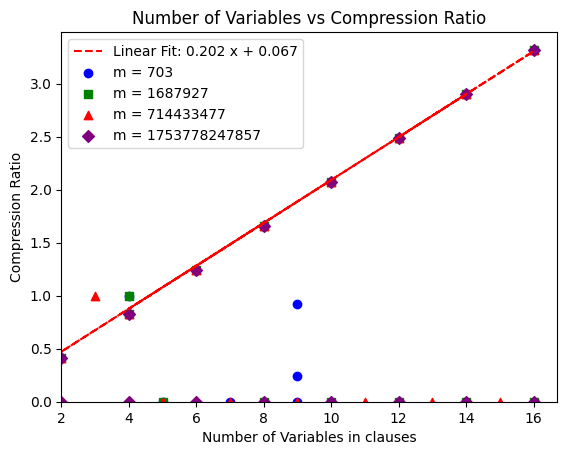

In [149]:
def scatter_and_linear_fit(tuples_set):
    # Extract x and y coordinates from the set of tuples where x is even
    x_coordinates = np.array([x for x, y in tuples_set if x % 2 == 0])
    y_coordinates = np.array([y for x, y in tuples_set if x % 2 == 0])

    # Perform linear regression to get the slope (m) and intercept (b)
    m, b = np.polyfit(x_coordinates, y_coordinates, 1)

    # Draw the linear fit (regression line)
    plt.plot(x_coordinates, m * x_coordinates + b,'--', color='red', label=f'Linear Fit: {round(m, 3)} x + {round(b, 3)}')

scatter_and_linear_fit(result)

# Create the scatter plot using the stored data
for idx, m in enumerate(m_list):
    plt.scatter(all_n_vars_list[idx], all_comp_ratio_list[idx], marker=markers[idx], color=colors[idx], label=f'm = {m}')


plt.xlim(2, None)
plt.ylim(0, None)
# Add labels and legend
plt.xlabel('Number of Variables in clauses')
plt.ylabel('Compression Ratio')
# Add a title
plt.title('Number of Variables vs Compression Ratio')
plt.legend()
plt.show()